In [1]:
import pandas as pd
import numpy as np

# Sample shoe reviews with brand, review text, and rating (1-5)
data = {
    "brand": ["Nike"] * 5 + ["Adidas"] * 5 + ["Puma"] * 5 + ["Reebok"] * 5,
    "review": [
        "Amazing shoes! Very comfortable for running.",  # Nike
        "Poor quality, sole came apart after a month.",
        "Great design but overpriced.",
        "Best shoes I've ever worn!",
        "Just okay, nothing special.",
        "Adidas makes the best running shoes!",  # Adidas
        "Not comfortable for long walks.",
        "Good grip and lightweight.",
        "Defective product, very disappointed.",
        "Worth the price, great cushioning.",
        "Puma shoes look stylish but hurt my feet.",  # Puma
        "Average quality, not durable.",
        "Perfect for gym workouts!",
        "Too tight, had to return.",
        "Good for casual wear.",
        "Reebok classics are always reliable.",  # Reebok
        "Sole started peeling after 2 weeks.",
        "Very comfortable for all-day use.",
        "Not as good as expected.",
        "Great value for money."
    ],
    "rating": [5, 1, 3, 5, 3, 5, 2, 4, 1, 4, 2, 3, 5, 1, 4, 5, 1, 4, 3, 4]
}

df = pd.DataFrame(data)
print(df.head())

  brand                                        review  rating
0  Nike  Amazing shoes! Very comfortable for running.       5
1  Nike  Poor quality, sole came apart after a month.       1
2  Nike                  Great design but overpriced.       3
3  Nike                    Best shoes I've ever worn!       5
4  Nike                   Just okay, nothing special.       3


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df["cleaned_review"] = df["review"].apply(clean_text)
print(df[["review", "cleaned_review"]].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /home/learntechbyme/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/learntechbyme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/learntechbyme/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         review  \
0  Amazing shoes! Very comfortable for running.   
1  Poor quality, sole came apart after a month.   
2                  Great design but overpriced.   
3                    Best shoes I've ever worn!   
4                   Just okay, nothing special.   

                       cleaned_review  
0    amazing shoe comfortable running  
1  poor quality sole came apart month  
2             great design overpriced  
3             best shoe ive ever worn  
4                okay nothing special  


In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment["compound"] >= 0.05:
        return "positive"
    elif sentiment["compound"] <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["cleaned_review"].apply(get_sentiment)
print(df[["brand", "review", "sentiment"]])

     brand                                        review sentiment
0     Nike  Amazing shoes! Very comfortable for running.  positive
1     Nike  Poor quality, sole came apart after a month.  negative
2     Nike                  Great design but overpriced.  positive
3     Nike                    Best shoes I've ever worn!  positive
4     Nike                   Just okay, nothing special.  negative
5   Adidas          Adidas makes the best running shoes!  positive
6   Adidas               Not comfortable for long walks.  positive
7   Adidas                    Good grip and lightweight.  positive
8   Adidas         Defective product, very disappointed.  negative
9   Adidas            Worth the price, great cushioning.  positive
10    Puma     Puma shoes look stylish but hurt my feet.  negative
11    Puma                 Average quality, not durable.   neutral
12    Puma                     Perfect for gym workouts!  positive
13    Puma                     Too tight, had to return.   neu

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/learntechbyme/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


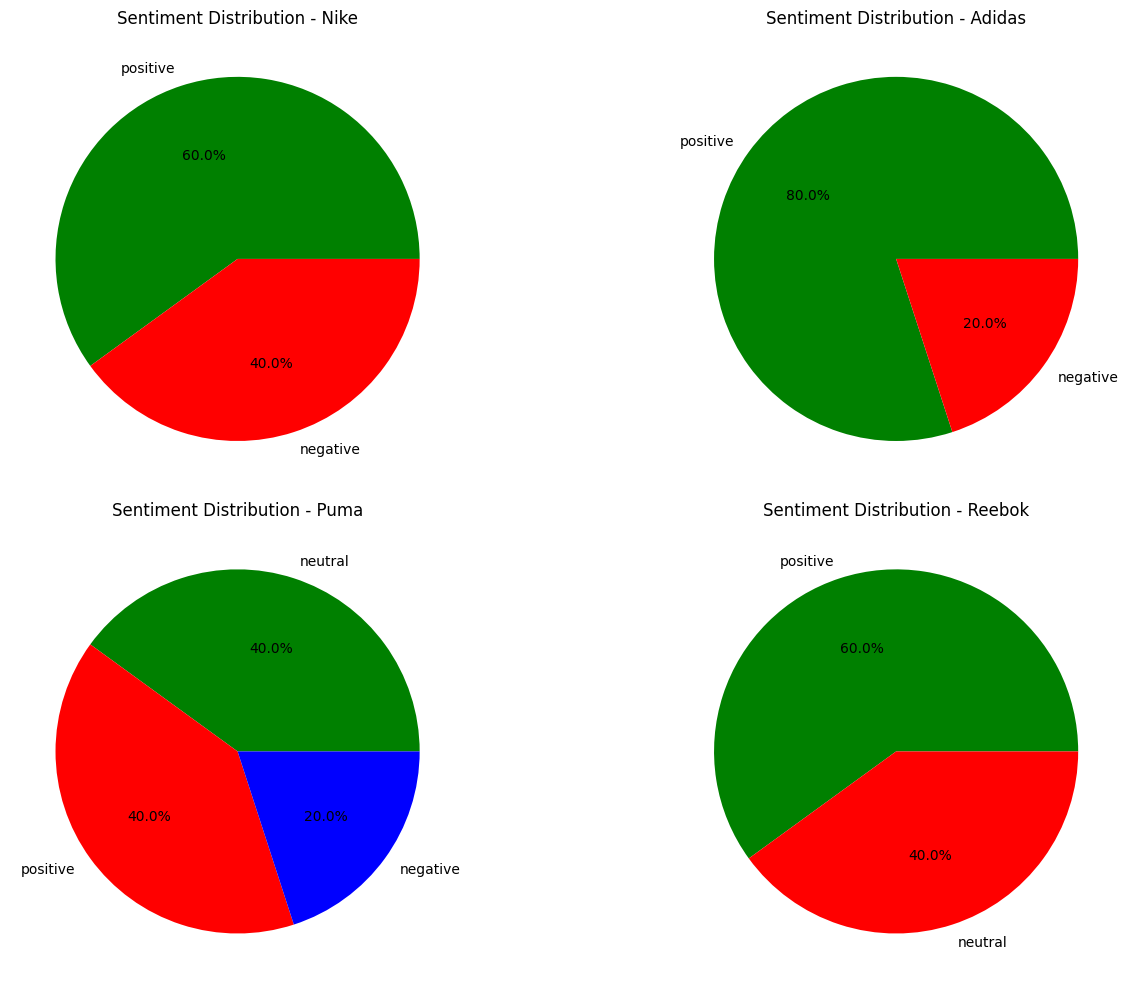

In [4]:
import matplotlib.pyplot as plt

brands = df["brand"].unique()

plt.figure(figsize=(15, 10))
for i, brand in enumerate(brands, 1):
    plt.subplot(2, 2, i)
    sentiment_counts = df[df["brand"] == brand]["sentiment"].value_counts()
    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct="%1.1f%%",
        colors=["green", "red", "blue"],
    )
    plt.title(f"Sentiment Distribution - {brand}")

plt.tight_layout()
plt.show()

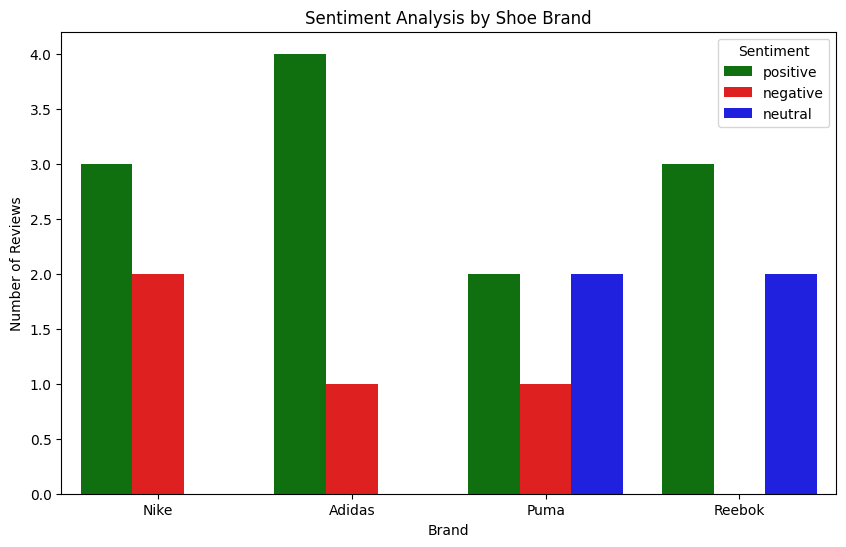

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="brand", hue="sentiment", palette={"positive": "green", "negative": "red", "neutral": "blue"})
plt.title("Sentiment Analysis by Shoe Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()